## NLP Assignment 2 

Members: Yoong Cheng Nee (B031910119),  Ding Xue Wing (B031910353)

## **Visualize frequent words using Wordcloud**

In [64]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [41]:
!pip install wordcloud

In [65]:
from wordcloud import WordCloud, STOPWORDS

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
corpus = open('/content/drive/MyDrive/Ass corpus.txt', 'r').read()

In [68]:
stopwords = set(STOPWORDS)

wc = WordCloud(
    background_color='white',
    max_words=2500,
    stopwords=stopwords
)

wc.generate(corpus)

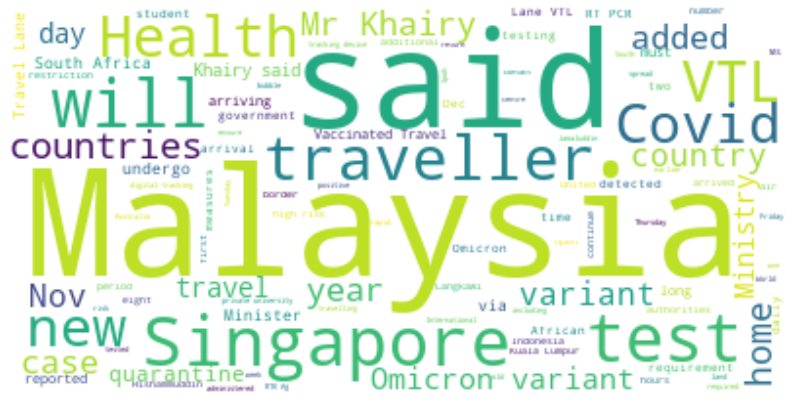

In [69]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Represent Top 20 most frequent ngrams**

In [70]:
import nltk, re, string, collections
from nltk.util import ngrams
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
corpus[0:2400]
corpus = re.sub('<.*>','',corpus)
corpus = re.sub('ENDOFARTICLE.','',corpus)
punctuationNoPeriod = "[" + re.sub("\.","",string.punctuation)+ "]"
corpus = re.sub(punctuationNoPeriod, "", corpus)
corpus[0:2400]
corpus_tokenized = corpus.split()
corpus_no_sw=[word for word in corpus_tokenized if not word in stopwords.words()]

**Represent Top 20 most frequent unigram**

In [72]:
corUnigrams = ngrams(corpus_no_sw, 1)
corUnigramFreq = collections.Counter(corUnigrams)
corUnigramFreq.most_common(20)

[(('said',), 30),
 (('Malaysia',), 21),
 (('Singapore',), 19),
 (('VTL',), 18),
 (('variant',), 18),
 (('travel',), 16),
 (('travellers',), 14),
 (('Khairy',), 14),
 (('Omicron',), 13),
 (('countries',), 12),
 (('The',), 11),
 (('home',), 11),
 (('tests',), 10),
 (('new',), 10),
 (('test',), 10),
 (('Mr',), 10),
 (('added',), 10),
 (('South',), 10),
 (('country',), 9),
 (('Nov',), 9)]

**Represent Top 20 most frequent bigram**

In [73]:
corBigrams = ngrams(corpus_no_sw, 2)
corBigramFreq = collections.Counter(corBigrams)
corBigramFreq.most_common(20)

[(('Mr', 'Khairy'), 10),
 (('Omicron', 'variant'), 9),
 (('Khairy', 'said'), 8),
 (('South', 'Africa'), 7),
 (('Nov', '19'), 5),
 (('Vaccinated', 'Travel'), 4),
 (('Travel', 'Lane'), 4),
 (('Lane', 'VTL'), 4),
 (('said', 'travellers'), 4),
 (('Kuala', 'Lumpur'), 4),
 (('new', 'variant'), 4),
 (('Health', 'Minister'), 3),
 (('Minister', 'Khairy'), 3),
 (('Khairy', 'Jamaluddin'), 3),
 (('day', 'arrival'), 3),
 (('must', 'undergo'), 3),
 (('48', 'hours'), 3),
 (('countries', 'reported'), 3),
 (('digital', 'tracking'), 3),
 (('tracking', 'device'), 3)]

**Represent Top 20 most frequent trigram**

In [74]:
corTrigrams = ngrams(corpus_no_sw, 3)
corTrigramFreq = collections.Counter(corTrigrams)
corTrigramFreq.most_common(20)


[(('Mr', 'Khairy', 'said'), 7),
 (('Vaccinated', 'Travel', 'Lane'), 4),
 (('Travel', 'Lane', 'VTL'), 4),
 (('Khairy', 'said', 'travellers'), 4),
 (('Health', 'Minister', 'Khairy'), 3),
 (('Minister', 'Khairy', 'Jamaluddin'), 3),
 (('digital', 'tracking', 'device'), 3),
 (('arrived', 'South', 'Africa'), 3),
 (('Singapore', 'Nov', '19'), 3),
 (('Khairy', 'Jamaluddin', 'said'), 2),
 (('must', 'undergo', 'RTPCR'), 2),
 (('two', 'years', 'Ms'), 2),
 (('Chinese', 'New', 'Year'), 2),
 (('United', 'States', 'Australia'), 2),
 (('States', 'Australia', 'France'), 2),
 (('Australia', 'France', 'Norway'), 2),
 (('use', 'digital', 'tracking'), 2),
 (('mandatory', 'quarantine', 'period'), 2),
 (('eight', 'countries', 'temporary'), 2),
 (('countries', 'temporary', 'travel'), 2)]

## **TF-IDF Representation**


In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
corpus = open('/content/drive/MyDrive/Ass corpus.txt', 'r').read()
corpus = nltk.sent_tokenize(corpus)

for i in range(len(corpus )):
    corpus [i] = corpus [i].lower()
    corpus [i] = re.sub(r'\W',' ',corpus [i])
    corpus [i] = re.sub(r'\s+',' ',corpus [i])

In [77]:
vectorizer=TfidfVectorizer()
vectors=vectorizer.fit_transform(corpus)
feature_names=vectorizer.get_feature_names_out()
dense=vectors.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)
df

,10,11,14,15,19,2020,24,28,29,30,36,43,48,72,abide,able,about,according,accordingly,achieved,actions,added,additional,additionally,addressed,addressing,administered,advice,africa,african,after,ag,agency,ahead,aims,air,airlines,airport,all,allowed,...,very,via,virus,visit,visited,visitors,vtl,vtls,waiting,want,was,we,wear,wednesday,week,weeks,wei,well,went,were,what,where,which,who,will,with,without,woman,worked,works,world,worth,would,xin,yaakob,year,years,you,your,zimbabwe
0,0.0,0.0,0.0,0.0,0.160398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.106495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.161805,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.120547,0.000000,0.0,0.000000,0.000000,0.161805,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.183862,0.104161,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.101946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.260621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.216924,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.184682,0.0,0.109820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.092675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.160002,0.0,0.000000,0.0,0.000000,0.160002,0.0,0.000000,0.000000,0.140807,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.090643,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.321041,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.166061,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
73,0.0,0.0,0.0,0.0,0.123206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.232968,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
74,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.193079,0.000000,0.0,0.294492,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.166834,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0

# New Section